# Plant Growth Prediction

### introduction about data:
**The dataset** The goal is to predict `Growth_Milestone` (plant will survive or not) of a given plant in a given plant

there are  6 independent variables:
1. `Soil_Type` : The type or composition of soil in which the plants are grown.
2. `Sunlight_Hours` : The duration or intensity of sunlight exposure received by the plants.
3. `Water_Frequency` : How often the plants are watered, indicating the watering schedule.
4. `Fertilizer_Type` : The type of fertilizer used for nourishing the plants.
5. `Temperature` : The ambient temperature conditions under which the plants are grown.
6. `Humidity` : The level of moisture or humidity in the environment surrounding the plants.

Target Variable:

* `Growth_Milestone` : Descriptions or markers indicating stages or significant events in the growth process of the plants.

Dataset Source Link :

https://www.kaggle.com/datasets/gorororororo23/plant-growth-data-classification?select=plant_growth_data.csv



In [11]:
import numpy as np
import pandas as pd

In [12]:
## data ingection step
df = pd.read_csv("data/plant_growth_data.csv")
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [13]:
df.isnull().sum()

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

In [15]:
# there is no null values in columns

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [17]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [18]:
## check for duplicated records
df.duplicated().sum()

0

In [19]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone'], dtype='object')
Categorical Columns: Index(['Soil_Type', 'Water_Frequency', 'Fertilizer_Type'], dtype='object')


In [20]:
df[categorical_columns].describe()

,Soil_Type,Water_Frequency,Fertilizer_Type
count,193,193,193
unique,3,3,3
top,clay,daily,none
freq,67,74,74


In [21]:
df.Soil_Type.value_counts()

Soil_Type
clay     67
sandy    64
loam     62
Name: count, dtype: int64

In [22]:
df.Water_Frequency.value_counts()

Water_Frequency
daily        74
bi-weekly    60
weekly       59
Name: count, dtype: int64

In [23]:

df.Fertilizer_Type.value_counts()

Fertilizer_Type
none        74
chemical    65
organic     54
Name: count, dtype: int64

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

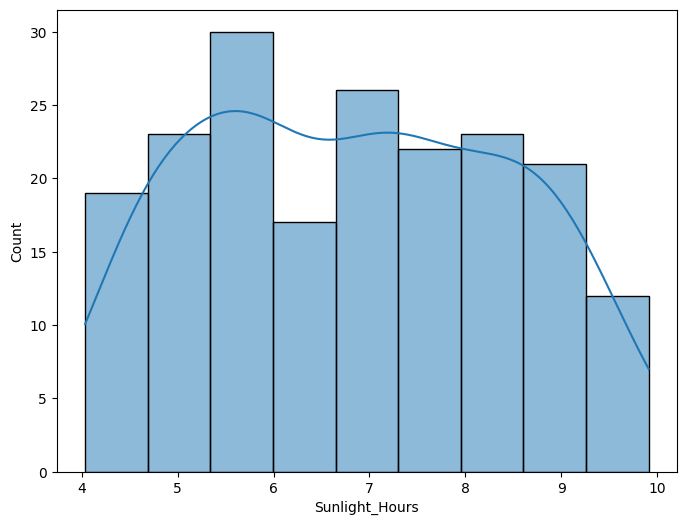

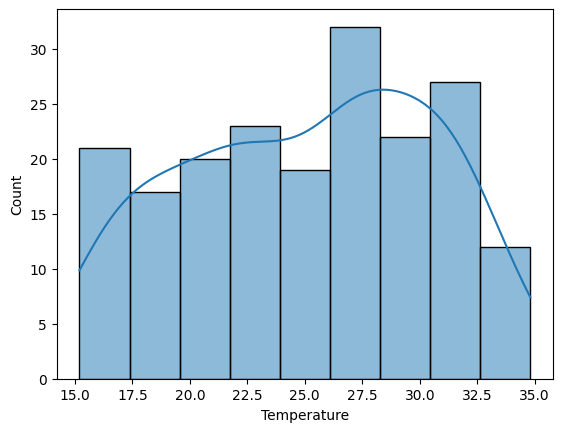

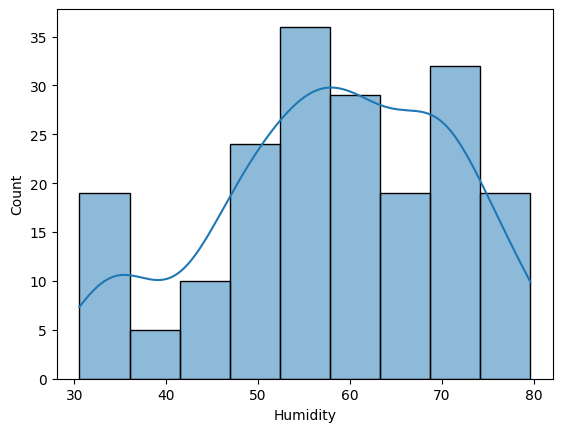

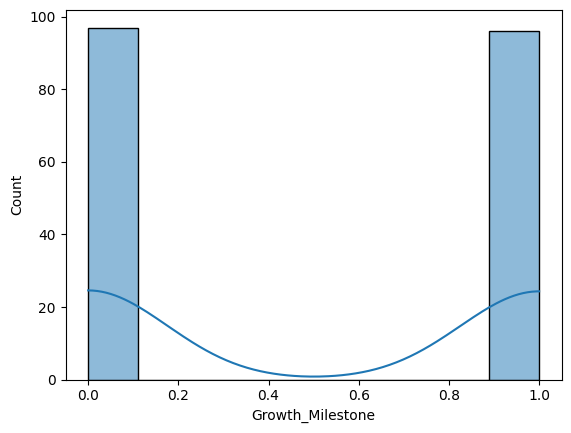

In [26]:
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

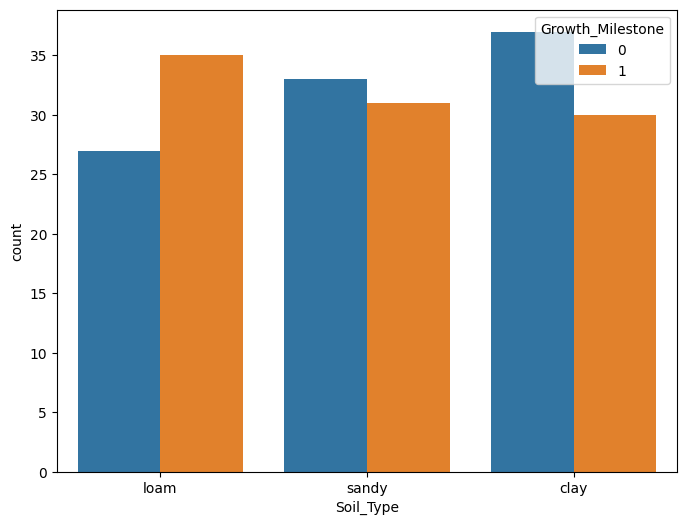

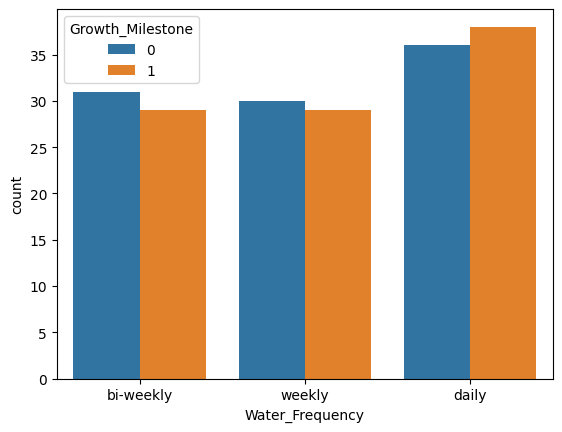

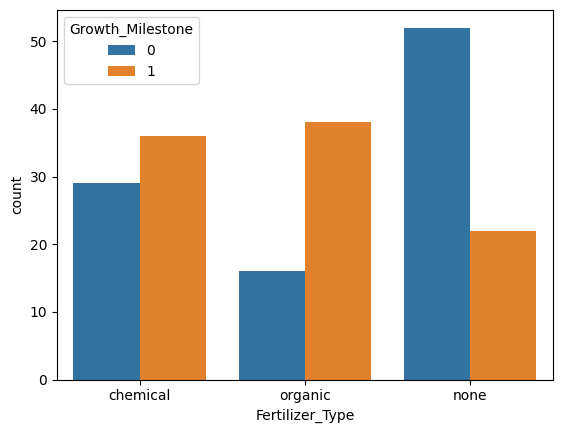

In [28]:
plt.figure(figsize=(8,6))
x=0
for i in categorical_columns:
    sns.countplot(data=df,x=i,hue="Growth_Milestone")
    print('\n')
    plt.show()

<Axes: >

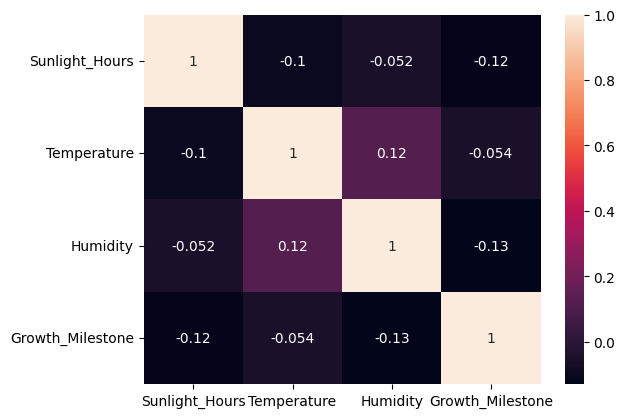

In [29]:
## correlation
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [ ]:
# there is no high correlated columns in data 

In [30]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [ ]:
# categorical_columns are nominal data in nature so we use one hot encodig or odinal encoding(for small data)